# Regression

## Important notes

1. *When you open this file on GitHub, copy the address to this file from the address bar of your browser. Now you can go to [Google Colab](https://colab.research.google.com/), click `File -> Open notebook -> GitHub`, paste the copied URL and click the search button (the one with the magnifying glass to the right of the search input box). Your personal copy of this notebook will now open on Google Colab.*
2. *Do not delete or change variable names in the code cells below. You may add to each cell as many lines of code as you need, just make sure to assign your solution to the predefined variable(s) in the corresponding cell. Failing to do so will make the tests fail.*
3. *To save your work, click `File -> Save a copy on GitHub` and __make sure to manually select the correct repository from the dropdown list__.*
4. *If you mess up with this file and need to start from scratch, you can always find the original notebook [here](https://github.com/hse-mlwp-2022/assignment4-template/blob/main/regression_exercise.ipynb). Just open it in Google Colab (see note 1) and save to your repository (see note 3). Remember to backup your code elsewhere, since this action will overwrite your previous work.*

## Initialization

### Import the libraries you need in the cell below

In [103]:
import pandas as pd
import numpy as np
import sklearn as s
import statsmodels.api as stm

### 0. Find your task
Follow the [link](https://docs.google.com/spreadsheets/d/194gX8uSUyqv_aQbJi8_TYuIgXHsDBtMDCofQ1uJ4GvA/edit?usp=sharing) to a Google Sheet with a list of students. Locate your name on the list and take note of the corresponding Student ID in the first column. Fill it in the cell below and run the cell. If you can't find yourself on the list, consult your course instructor.

In [1]:
### BEGIN YOUR CODE

Student_ID = 11

### END YOUR CODE

Now run the next cell. It will print all information for you.

In [4]:
task_id = None if Student_ID is None else Student_ID % 5 if Student_ID % 5 > 0 else 5
_model_power = None if Student_ID is None else (Student_ID % 4) + 3
if task_id is not None:
    print(f"TASKID is {task_id}")
    print(f"Please, choose a dataset No {task_id} below")
    print(f"Your second model must be of power p = {_model_power}")
else:
    print("Please, enter your Student ID in the cell above!")

TASKID is 1
Please, choose a dataset No 1 below
Your second model must be of power p = 6


#### Datasets

1. Poultry meat consumption in Europe, kilograms per person per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2000 | 2001 | 2002 | 2003 | 2004 | 2005 | 2006 | 2007 | 2008 | 2009 | 
| Consumption | 16.0 | 17.9 | 18.6 | 18.3 | 19.0 | 19.3 | 19.2 | 20.3 | 21.1 | 21.9 | 

2. Sugar consumption in Russia, grams per person per day

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Decade | 1950 | 1960 | 1970 | 1980 | 1990 | 2000 | 2015 |
| Consumption | 32 | 85 | 115 | 130 | 130 | 96 | 107 |

3. Poultry meat consumption in Asia, kilograms per person per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2000 | 2001 | 2002 | 2003 | 2004 | 2005 | 2006 | 2007 | 2008 | 2009 | 
| Consumption | 6.7 | 6.6 | 6.8 | 7.0 | 7.0 | 7.5 | 7.7 | 8.2 | 8.6 | 8.8 | 

4. Poultry meat consumption in Africa, kilograms per person per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2000 | 2001 | 2002 | 2003 | 2004 | 2005 | 2006 | 2007 | 2008 | 2009 | 
| Consumption | 4.2 | 4.3 | 4.5 | 4.7 | 4.6 | 4.7 | 4.8 | 5.2 | 5.4 | 5.5 | 

5. Demographic situation in Russia, number of marriages per 1000 people per year

|     |     |     |     |     |     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Year | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 | 2018 | 2019 | 2020 |
| Marriages per 1000 population | 9.2 | 8.5 | 8.5 | 8.4 | 7.9 | 6.7 | 7.1 | 6.1 | 6.3 | 5.3 |


### 1. Define a pandas dataset with the data for your task
[This](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) documentation might help.

**Make sure to normalize your $x$ variable, i.e. replace years with sequential numbers 0, 1, ...**

In [104]:
# Place your code here to create the dataset here
stat = {'god': [i for i in range(0,10)], 'kg': [16.0, 17.9, 18.6, 18.3, 19.0, 19.3, 19.2, 20.3, 21.1, 21.9]}
df = pd.DataFrame(stat)
df

,god,kg
0,0,16.0
1,1,17.9
2,2,18.6
3,3,18.3
4,4,19.0
5,5,19.3
6,6,19.2
7,7,20.3
8,8,21.1
9,9,21.9


## First regression model

You should build the following model:

$$ y_1 = \theta_2 \cdot x^2 + \theta_1 \cdot x + \theta_0 $$

where $y$ is the response variable and $x$ is the explanatory variable (see description of your dataset).

### 2. Define feature matrix $X$ for the first model (1 point)

It should be a `numpy` array or a `pandas` dataframe

In [105]:
# Place your code here instead of '...'
feature_matrix_X = np.vstack((np.ones(len(df['god'])), df['god'], df['god']*df['god'])).T

feature_matrix_X

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])

### 3. Train first regression model with OLS method by using matrix multiplications (2 points)

Use the entire dataset for training. You can find the formula on our lectures and in the seminar notebook.

`first_model_coeffs` should be an iterable, e.g. a list or a numpy array

In [106]:
# Place your code here instead of '...'
first_model_coeffs = np.linalg.inv(feature_matrix_X.T.dot(feature_matrix_X)).dot(feature_matrix_X.T).dot(df['kg'])

print(f"Coefficints of the first regression model are '{first_model_coeffs}'")

Coefficints of the first regression model are '[1.68236364e+01 5.00000000e-01 3.03030303e-03]'


In [107]:
out1 = pd.DataFrame(feature_matrix_X)
for i in range(0, len(first_model_coeffs)):
  out1[i] = out1[i] * first_model_coeffs[i]
out1 = out1.apply(lambda o: sum([o[i] for i in range(0, out1.columns.stop)]), axis=1)

out1

0    16.823636
1    17.326667
2    17.835758
3    18.350909
4    18.872121
5    19.399394
6    19.932727
7    20.472121
8    21.017576
9    21.569091
dtype: float64

## Second regression model

Choose the power $p$ of your model (see step 0 above). You should build the following model:

$$ y_2 = \sum_{i=1}^{p}{\theta_i \cdot x^p} $$

where $y$ is the response variable and $x$ is the explanatory variable (see description of your dataset) and $p$ is the power of the model.

### 4. Train second regression model with OLS method using `stats.models.regression` module (2 points)

`second_model_coeffs` should be an iterable, e.g. a list or a numpy array

In [108]:
feature_matrix_X2 = np.vstack((np.ones(len(df['god'])), df['god'], df['god']**2, df['god']**3, df['god']**4, df['god']**5, df['god']**6)).T

In [109]:
# Place your code here instead of '...'
second_model = stm.OLS(df.kg.values, feature_matrix_X2).fit()
second_model_coeffs = second_model.params


print(f"Coefficients of the second regression model are '{second_model_coeffs}'")

Coefficients of the second regression model are '[ 1.59880769e+01  3.77523252e+00 -2.51964180e+00  8.84974505e-01
 -1.62743056e-01  1.49503205e-02 -5.34722222e-04]'


In [110]:
out2 = pd.DataFrame(second_model.predict(feature_matrix_X2))

out2

,0
0,15.988077
1,17.980315
2,18.380070
3,18.592238
4,18.869790
5,19.145315
6,19.477552
7,20.112937
8,21.162133
9,21.891573


## Third regression model

You should build the following model:

$$ y_3 = \theta_1 \cdot x + \theta_0 $$

where $y$ is the response variable and $x$ is the explanatory variable (see description of your dataset).

### 5. Train third regression model with gradient descent (3 points, optional)

You can write your own function for gradient descent or find one on the Internet. It should be possible to change the initial value and learning rate.

`third_model_coeffs` should be an iterable, e.g. a list or a numpy array

In [ ]:
third_model_coeffs = ... # Place your code here instead of '...'

print(f"Coefficints of the third regression model are '{third_model_coeffs}'")

## Error estimation

### 6. Calculate MSE and RMSE for all your regression models (2 points)

Error estimations should be floating point numbers

In [111]:
from sklearn.metrics import mean_squared_error as mse

y = df.kg.values

first_model_mse = mse(y, out1) # Place your code here instead of '...'
second_model_mse = mse(y, out2) # Place your code here instead of '...'
#third_model_mse = mse(y, out3) # Place your code here instead of '...' (optional)

first_model_rmse = mse(y, out1, squared=False) # Place your code here instead of '...'
second_model_rmse = mse(y, out2, squared=False) # Place your code here instead of '...'
#third_model_rmse = mse(y, out3, squared=False) # Place your code here instead of '...' (optional)

## Visualization

### 7. Use `matplotlib` to visualize your results (graded manually, exam)

You should build a single plot with all your models (2 or 3) drawn as curves/lines of different type and color. Additional points if you make the curves look smooth. Draw your dataset as dots on the same plot, do not connect them with lines.

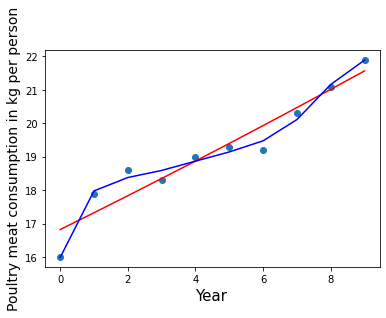

In [114]:
# Place your code here
import pylab as plt

plt.scatter(df['god'], y)
plt.plot(df['god'], out1, 'r')
plt.plot(df['god'], out2.values, 'b')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Poultry meat consumption in kg per person', fontsize=14)
plt.show()

### 8. Prepare to discuss your results with the teacher (exam)

Which model is better? Why? What else can you do to make the predictions better?

In [99]:
print(f'1.MSE: {first_model_mse}  RMSE: {first_model_rmse} \n2.MSE: {second_model_mse} RMSE: {second_model_rmse}')

1.MSE: 0.23027878787878792  RMSE: 0.47987372076285645 
2.MSE: 0.02972062937063183 RMSE: 0.17239672088132021


As we can see the second model shows us better mean squared error and root mean squared error --> Second model makes better predictions on this data set.

To get better results we may increase number of observations and correct the number of parametrs (increse the number of significant parametrs (for example, other meat consumption, average price per kg(better to make categories (maybe from minimum with step +5euro ((1 - [5Euro:10Euro), 2 - [10Euro:15Euro))) and delete insignificant)  

